In [27]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [23]:
nf = pd.read_csv('bollywood-1.csv')
print(nf.head(150))

     SlNo Release Date                    MovieName ReleaseTime      Genre  \
0       1    18-Apr-14                     2 States          LW    Romance   
1       2     4-Jan-13                 Table No. 21           N  Thriller    
2       3    18-Jul-14           Amit Sahni Ki List           N     Comedy   
3       4     4-Jan-13             Rajdhani Express           N     Drama    
4       5     4-Jul-14                 Bobby Jasoos           N     Comedy   
..    ...          ...                          ...         ...        ...   
144   145    27-Feb-15           Dum Laga Ke Haisha           N     Comedy   
145   146    13-Mar-15                         NH10           N   Thriller   
146   147    20-Mar-15  Dilliwali Zaalim Girlfriend           N     Comedy   
147   148    20-Mar-15                     Hunterrr           N     Comedy   
148   149    23-May-14                Kochadaiiyaan          HS     Action   

     Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  Y

In [4]:
file = open("bollywood-1.csv")
reader = csv.reader(file)
lines= len(list(reader))
print(lines)

150


In [5]:
x = nf['ReleaseTime'].value_counts()
x.sort_values(ascending=False)
print(x)
nf.sort_values(["ReleaseTime"], #descending
                    ascending=[False])
print(nf)

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64
     SlNo Release Date                    MovieName ReleaseTime      Genre  \
0       1    18-Apr-14                     2 States          LW    Romance   
1       2     4-Jan-13                 Table No. 21           N  Thriller    
2       3    18-Jul-14           Amit Sahni Ki List           N     Comedy   
3       4     4-Jan-13             Rajdhani Express           N     Drama    
4       5     4-Jul-14                 Bobby Jasoos           N     Comedy   
..    ...          ...                          ...         ...        ...   
144   145    27-Feb-15           Dum Laga Ke Haisha           N     Comedy   
145   146    13-Mar-15                         NH10           N   Thriller   
146   147    20-Mar-15  Dilliwali Zaalim Girlfriend           N     Comedy   
147   148    20-Mar-15                     Hunterrr           N     Comedy   
148   149    23-May-14                Kochadaiiyaan          HS     Action

In [7]:
max= nf.loc[(nf['ReleaseTime']=="FS")].groupby("Genre").size().idxmax()
print(max)

 Drama 


In [8]:
print(pd.crosstab( nf.ReleaseTime,nf.Genre))

Genre         Drama   Action  Action   Comedy  Romance  Thriller  Thriller 
ReleaseTime                                                                
FS                 4       3        0       3        3         4          0
HS                 6       3        0       5        3         1          0
LW                 1       3        0       5        4         1          1
N                 24      12        3      23       15        20          2


In [30]:
nf['year'] = pd.DatetimeIndex(nf['Release Date']).year #extract new column
s=nf['year'].value_counts().idxmax()
print(s)

2014


In [10]:
import datetime
nf['month'] = pd.DatetimeIndex(nf['Release Date']).month
money= nf.loc[(nf['Budget']>=30)].groupby("month").size().idxmax()
month = datetime.date(1900, money, 1).strftime('%B')
print (month)



February


In [11]:
nf['ROI']=(nf['BoxOfficeCollection']-nf['Budget'])/nf['Budget']
flop= nf[['MovieName','ROI']].sort_values(['ROI'])
print(flop[:10])

                MovieName       ROI
9               Gangoobai -0.995000
15                Bandook -0.977500
53               Sona Spa -0.976000
3        Rajdhani Express -0.950000
49   Kya Dilli Kya Lahore -0.928571
121               Satya 2 -0.926667
67           Purani Jeans -0.890000
103        Samrat and Co. -0.888889
30              Heartless -0.875000
102               Kaanchi -0.870968


In [12]:
c = nf.groupby("ReleaseTime")
f=c['ROI'].mean().sort_values().reset_index(name='Average_ROI')
print(f)

  ReleaseTime  Average_ROI
0           N     0.657722
1          HS     0.850867
2          FS     0.973853
3          LW     1.127205


In [13]:
correlate = nf["BoxOfficeCollection"]. corr(nf["YoutubeLikes"])
print(correlate)

0.6825165877731297


<AxesSubplot:title={'center':'YoutubeViews'}, xlabel='Genre'>

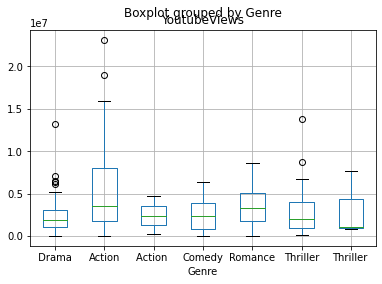

In [14]:
nf.boxplot(by ='Genre', column =['YoutubeViews'], grid = True)

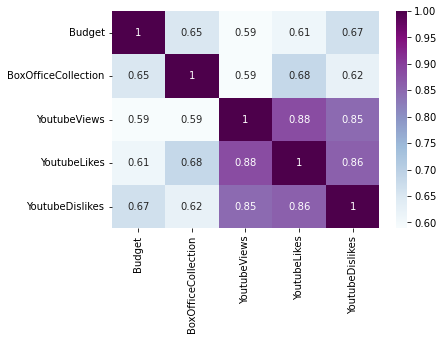

In [28]:
dataplot = sb.heatmap(nf[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(), cmap="BuPu", annot=True)
plt.show()

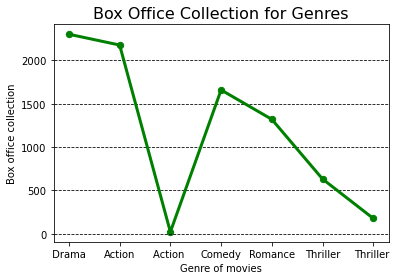

In [37]:
c= nf[(nf['year'] >= 2013) & (nf['year'] <= 2015)].groupby("Genre")
f = c['BoxOfficeCollection'].sum().reset_index(name='BoxOfficeTotalCollection')
y=f['BoxOfficeTotalCollection']
x= f['Genre']
plt.plot(x,y,linewidth = '3',color='g')
plt.title('Box Office Collection for Genres', fontsize=16)
plt.scatter(x, y, color = 'g' , s=40)
plt.xlabel("Genre of movies")
plt.ylabel("Box office collection")
plt.grid(axis = 'y',color = 'black',linestyle = '--')
plt.show()

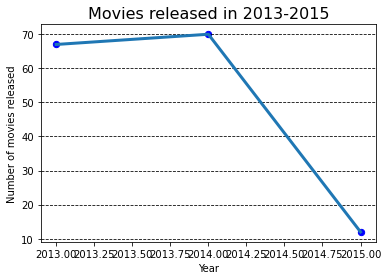

In [38]:
c = nf[(nf['year'] >= 2013) & (nf['year'] <= 2015)].groupby("year")
d = c.size().reset_index(name="MoviesCount")

x=d['year']
y=d['MoviesCount']
plt.plot(x,y,linewidth = '3')
plt.title('Movies released in 2013-2015', fontsize=16)
plt.scatter(x, y, color = 'blue' , s=40)
plt.xlabel("Year")             #labels
plt.ylabel("Number of movies released")
plt.grid(axis = 'y',color = 'black',linestyle = '--')
plt.show()

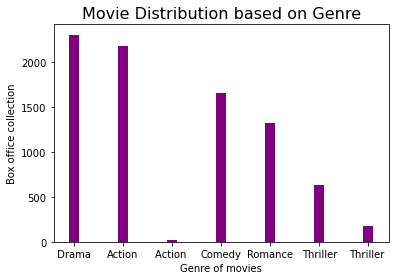

In [39]:
c = nf.groupby("Genre")
d = c['BoxOfficeCollection'].sum().reset_index(name='BoxOfficeTotalCollection')
x = d['Genre']
y = d['BoxOfficeTotalCollection']
plt.title('Movie Distribution based on Genre', fontsize=16)
plt.xlabel("Genre of movies")
plt.ylabel("Box office collection")
plt.bar(x,y,color = "purple", width = 0.2)
plt.show()

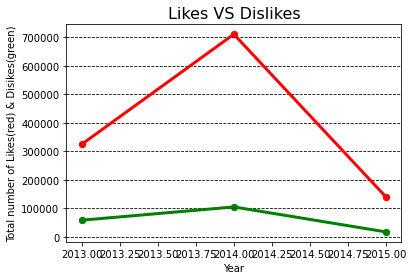

In [36]:
c = nf[(nf['year'] >= 2013) & (nf['year'] <= 2015)].groupby("year")
d = c['YoutubeLikes'].sum().reset_index(name='TotalYoutubeLikes')
y=d['TotalYoutubeLikes']
x=d['year']
plt.plot(x, y, linewidth = '3',color='r')
plt.scatter(x, y, color = 'red' , s=40)
d = c['YoutubeDislikes'].sum().reset_index(name='TotalYoutubeDisLikes')
z=d['TotalYoutubeDisLikes']
plt.plot(x, z,color='g',linewidth = '3',)
plt.scatter(x, z, color = 'g' , s=40)
plt.title('Likes VS Dislikes', fontsize=16)
plt.grid(axis = 'y',color = 'black',linestyle = '--')
plt.xlabel("Year")
plt.ylabel("Total number of Likes(red) & Disikes(green)")
plt.show()